In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.api as sm

In [57]:
data = pd.read_csv('products.csv', sep='|', error_bad_lines=False)

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
health_data = data[data['BU']=='Health/Wellness']

In [59]:
health_data['PRODUCT_CATEGORY_LABEL'].value_counts()

COLD/FLU RE          75259
SYRUP                75104
BANDAGES             68857
MULTI-GENERAL        64671
LIP BALMS            61420
THROAT LOZ/          56941
HOMEOPATHIC          55075
IBUPROFEN            53174
TABLETS/CAPSU        51141
THIN MAXIS           49685
HOSIERY              48805
PAIN/FEVER           48443
DRY EYE              47915
JOINT                47511
PILLS/TABLET         45565
LUB/MOISTURE         45316
ACETAMINOPHEN        45257
FISH OIL             44270
MAXI PADS            43642
ALLERGY              43203
TOPICALS             42887
COUGH/COLD           42785
WOUND DRESSI         41739
LUBRICATED           41254
HIGH FA              40333
CALCIUM              39413
MEAL REPL BARS S     39051
CORE                 38808
VIT B                37493
ETHNIC               36805
                     ...  
OSTOMY                 144
CLEANSE/DETOX          131
2.75                   114
VITAMINS/S              76
DIABETIC SUPP           76
VITAMINS/SUPPL          75
I

In [60]:
dry_eye = health_data[health_data['PRODUCT_CATEGORY_LABEL']=='DRY EYE']

In [61]:
alergy = health_data[health_data['PRODUCT_CATEGORY_LABEL']=='ALERGY']

In [62]:
vit_b = health_data[health_data['PRODUCT_CATEGORY_LABEL']=='VIT B']

In [63]:
dry_eye.drop(['BU', 'PRODUCT_CATEGORY_LABEL', 'PRODUCT_CATEGORY', 'OPSTUDY', 'OPSTUDY_LABEL'], axis=1, inplace=True)

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
dry_eye.head()

,WEEK,PLN,PLN_LABEL,ACTUAL,SEG,PROMO
1673,1160529,40000415307,REFRESH OPTIVE ADVANCED 10ML,150,A,N
1674,1160529,40000415307,REFRESH OPTIVE ADVANCED 10ML,1113,C1,N
1675,1160529,40000415307,REFRESH OPTIVE ADVANCED 10ML,295,B,N
1676,1160529,40000415307,REFRESH OPTIVE ADVANCED 10ML,15,NoSegment-C,N
2474,1160529,40000684179,THERA TEARS LUB EYE DROPS 15ML,153,A,N


In [65]:
dry_eye['WEEK'] = dry_eye['WEEK'].apply(lambda x: str(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
dry_eye['PLN'] = dry_eye['PLN'].apply(lambda x: str(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
dry_eye['PLN_LABEL'] = dry_eye['PLN_LABEL'].apply(lambda x: str(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
dry_eye['ACTUAL'] = dry_eye['ACTUAL'].apply(lambda x: float(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
dry_eye['SEG'] = dry_eye['SEG'].apply(lambda x: str(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
dry_eye['PROMO'] = dry_eye['PROMO'].apply(lambda x: str(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
dry_eye.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47915 entries, 1673 to 19461110
Data columns (total 6 columns):
WEEK         47915 non-null object
PLN          47915 non-null object
PLN_LABEL    47915 non-null object
ACTUAL       47915 non-null float64
SEG          47915 non-null object
PROMO        47915 non-null object
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


In [72]:
def date_divide(x):
    x=x[1:]
    x='20' + x
    x=x[:4] + '-' + x[4:]
    x=x[:7] + '-' + x[7:]
    return x

In [73]:
dry_eye['WEEK'] = dry_eye['WEEK'].apply(lambda x: date_divide(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
dry_eye['WEEK'] = pd.to_datetime(dry_eye['WEEK'])

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
dry_eye['YEAR'] = [d.year for d in dry_eye['WEEK']]
dry_eye['MONTH'] = [d.month for d in dry_eye['WEEK']]
dry_eye['DAY'] = [d.day for d in dry_eye['WEEK']]

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [76]:
#dry_eye.drop(['WEEK'], axis=1, inplace=True)

In [77]:
dry_eye.head()

,WEEK,PLN,PLN_LABEL,ACTUAL,SEG,PROMO,YEAR,MONTH,DAY
1673,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,150.0,A,N,2016,5,29
1674,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,1113.0,C1,N,2016,5,29
1675,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,295.0,B,N,2016,5,29
1676,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,15.0,NoSegment-C,N,2016,5,29
2474,2016-05-29,40000684179,THERA TEARS LUB EYE DROPS 15ML,153.0,A,N,2016,5,29


In [78]:
dry_eye['PLN'].isnull().values.any()

False

In [79]:
dry_eye['PLN_LABEL'].isnull().values.any()

False

In [80]:
dry_eye['ACTUAL'].isnull().values.any()

False

In [81]:
dry_eye['SEG'].isnull().values.any()

False

In [82]:
dry_eye['PROMO'].isnull().values.any()

False

In [83]:
seg_dic = {'A':0, 'NoSegmen-A':1, 'B':2, 'NoSegment-B':3, 'C1':4, 'C2':5, 'C3':6, 'C4':7, 'NoSegment-C':8, 'NoBuisnessUnit':9}

In [84]:
dry_eye['SEG'] = dry_eye['SEG'].replace(seg_dic)

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
def replace_negative(x):
    if x<0:
        return 0
    else:
        return x

In [86]:
dry_eye['ACTUAL'] = dry_eye['ACTUAL'].apply(lambda x: replace_negative(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
promo_dict = {'Y':1, 'N':0}

In [88]:
dry_eye['PROMO'] = dry_eye['PROMO'].replace(promo_dict)

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
dry_eye['PROMO'].value_counts()

0      28926
1      11587
nan     7402
Name: PROMO, dtype: int64

In [90]:
def is_nan(x):
    if x=='nan':
        return 3
    else:
        return x

In [91]:
dry_eye['PROMO'] = dry_eye['PROMO'].apply(lambda x: is_nan(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
dry_eye['PROMO'].value_counts()

0    28926
1    11587
3     7402
Name: PROMO, dtype: int64

In [93]:
dry_eye['ACTUAL'].mean()

403.78737347386

In [94]:
def many_act(x):
    if x>=2000:
        return 1
    else:
        return 0

In [95]:
dry_eye['MANY_ACTUAL'] = [many_act(x) for x in dry_eye['ACTUAL']]

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
dry_eye['PROMO'].equals(dry_eye['MANY_ACTUAL'])

False

In [97]:
comp_vect = []
for i in range(len(dry_eye)):
    if dry_eye['PROMO'].values[i] != 3:
        if dry_eye['PROMO'].values[i]==dry_eye['MANY_ACTUAL'].values[i]:
            comp_vect.append(1)
        else:
            comp_vect.append(0)

In [98]:
comp_vect.count(1)/len(comp_vect)

0.7252240021721422

In [99]:
# for i in range(len(dry_eye)):
#     if dry_eye['PROMO'].values[i]==3:
#         dry_eye.loc['PROMO', i] = dry_eye['MANY_ACTUAL'].values[i]

In [100]:
dry_eye.head(20)

,WEEK,PLN,PLN_LABEL,ACTUAL,SEG,PROMO,YEAR,MONTH,DAY,MANY_ACTUAL
1673,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,150.0,0,0,2016,5,29,0
1674,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,1113.0,4,0,2016,5,29,0
1675,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,295.0,2,0,2016,5,29,0
1676,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,15.0,8,0,2016,5,29,0
2474,2016-05-29,40000684179,THERA TEARS LUB EYE DROPS 15ML,153.0,0,0,2016,5,29,0
2475,2016-05-29,40000684179,THERA TEARS LUB EYE DROPS 15ML,1195.0,4,0,2016,5,29,0
2476,2016-05-29,40000684179,THERA TEARS LUB EYE DROPS 15ML,670.0,2,0,2016,5,29,0
2477,2016-05-29,40000684179,THERA TEARS LUB EYE DROPS 15ML,9.0,8,0,2016,5,29,0
6278,2016-05-29,40000358396,WALG ULTR LUBRI EYE DRP .33OZ 2PK,524.0,6,0,2016,5,29,0
6279,2016-05-29,40000358396,WALG ULTR LUBRI EYE DRP .33OZ 2PK,3.0,2,0,2016,5,29,0


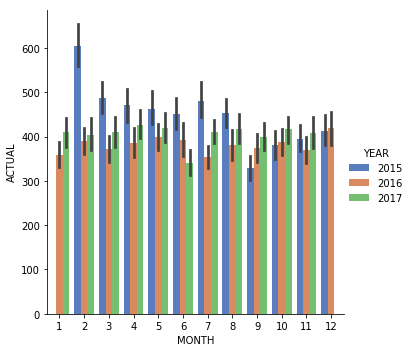

In [101]:
sns.catplot(x='MONTH', y='ACTUAL', hue='YEAR', data=dry_eye, kind='bar', palette='muted');

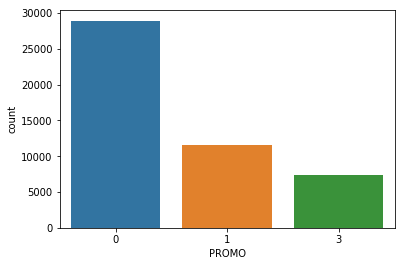

In [102]:
sns.countplot(x='PROMO', data=dry_eye);

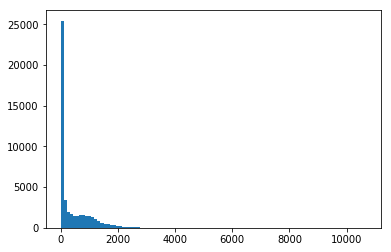

In [103]:
plt.hist(x='ACTUAL', data=dry_eye, bins=100);

In [104]:
dry_eye['PLN_LABEL'].value_counts()

BLINK GEL TEAR LUB EYE DROPS.34OZ    939
BLINK TEARS LUBRICATING DRPS .5OZ    931
BLINK TEARS LUBRICATING DROPS 1OZ    895
WALG ARTIFICIAL TEAR LBRCNT .5OZ     867
B&L SOOTHE LUB EYE DRPS .02OZ 28S    845
VISINE TEARS FOR DRY EYES    .5OZ    832
VISINE TEARS L/LST RLF DRYEYE.5OZ    821
SOOTHE HYDRATION DRY EYE DROP.5OZ    820
WALG LUB E DRP SNGL USE .01OZ 30S    813
SYSTANE ULT HIGH PERFORMANC .33OZ    791
WALG SODIUM CHLR OPTH ONT 5%.13OZ    782
B&L SOOTHE XP                15ML    776
SYSTANE LUB EYE DRP          .5OZ    775
SYSTANE BLNC LBRCNT EYE DROP.33OZ    770
SYSTANE PM LUBE EYE OINTMENT.12OZ    760
SYSTANE ULTRA            .33OZ 2S    748
SYSTANE BALANCE EYE DROP .33OZ 2S    747
WALG LUB E DRP SNGL USE .01OZ 70S    745
SIMILASAN E/DROP D/EYE 30014.33OZ    744
SIMILASAN CMPLT E RLF DRPS .33OZ     738
WALGREENS MURO 128 DROPS    .500Z    733
WALG ULT LUB EYEDRP VIAL .01OZ25S    723
SYSTANE LUB EYE DRP          30ML    718
SYSTANE ULTRA POCKET PACK.14OZ 2S    715
SYSTANE GEL DROP

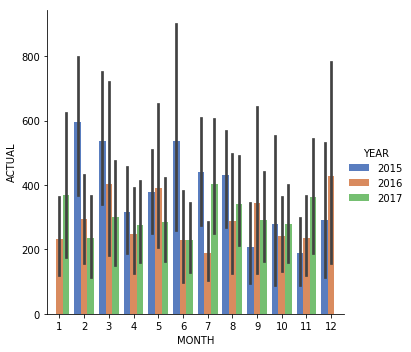

In [105]:
sns.catplot(x='MONTH', y='ACTUAL', hue='YEAR', data=dry_eye[dry_eye['PLN_LABEL']=='BLINK GEL TEAR LUB EYE DROPS.34OZ'], kind='bar', palette='muted');

In [111]:
items = dry_eye[['WEEK', 'ACTUAL', 'PLN_LABEL']].copy()

In [112]:
items.head()

,WEEK,ACTUAL,PLN_LABEL
1673,2016-05-29,150.0,REFRESH OPTIVE ADVANCED 10ML
1674,2016-05-29,1113.0,REFRESH OPTIVE ADVANCED 10ML
1675,2016-05-29,295.0,REFRESH OPTIVE ADVANCED 10ML
1676,2016-05-29,15.0,REFRESH OPTIVE ADVANCED 10ML
2474,2016-05-29,153.0,THERA TEARS LUB EYE DROPS 15ML


In [162]:
first_item = items[items['PLN_LABEL']=='BLINK GEL TEAR LUB EYE DROPS.34OZ']

In [163]:
first_item.drop(['PLN_LABEL'], axis=1, inplace=True)

In [164]:
first_item['WEEK'] = first_item['WEEK'].apply(lambda x: str(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
def week_correct(x):
    return x[:10]

In [167]:
first_item['WEEK'] = first_item['WEEK'].apply(lambda x: week_correct(x))

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
first_item.set_index('WEEK')

,ACTUAL
WEEK,
2016-05-29,120.0
2016-05-29,699.0
2016-05-29,393.0
2016-05-29,12.0
2015-12-27,1039.0
2015-12-27,17.0
2015-12-27,86.0
2015-12-27,2.0
2015-12-27,391.0


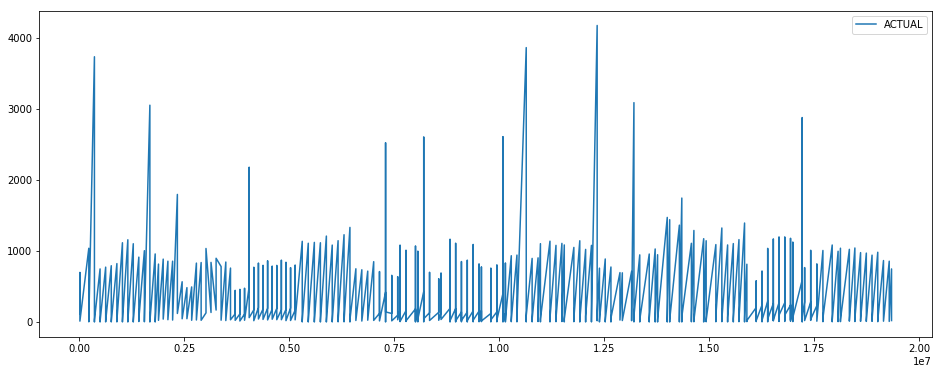

In [169]:
first_item.plot(figsize=(16,6));

In [170]:
first_item.describe()

,ACTUAL
count,939.000000
mean,305.104366
std,479.435936
min,0.000000
25%,11.000000
50%,70.000000
75%,488.500000
max,4180.000000


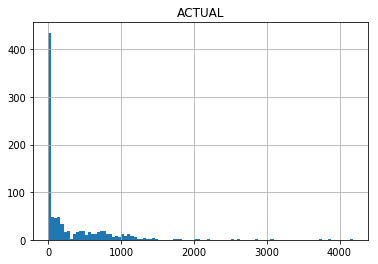

In [171]:
first_item.hist(bins=100);

In [172]:
first_item.std()/first_item.mean()

ACTUAL    1.571383
dtype: float64

In [173]:
sm.stats.stattools.jarque_bera(first_item)

C:\Users\Anton.Lahunou\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [141]:
sm.tsa.adfuller(first_item['ACTUAL'])

(-6.055244691555614,
 1.2496888166666875e-07,
 22,
 916,
 {'1%': -3.4375090829661534,
  '5%': -2.864700447588469,
  '10%': -2.5684528237924527},
 13503.96362198777)

In [161]:
diff_item = first_item.diff(periods=1).dropna()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [146]:
sm.tsa.adfuller(diff_item)

(-10.205527366652975,
 5.818151174182877e-18,
 22,
 915,
 {'1%': -3.437516929214992,
  '5%': -2.86470390726455,
  '10%': -2.5684546666069457},
 13516.66589772911)